In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [ ]:
# 하이퍼링크 그래프 다운로드 받기
with open("example_index","wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
  f.write(r.content)
with open("example_arcs", "wb") as f:
   r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
   f.write(r.content)

In [ ]:
# 하이퍼링크 그래프 불러오기 
nodes = np.loadtxt("example_index", dtype=object)[:,0]
num_nodes = nodes.shape[0]
edges = np.loadtxt("example_arcs", dtype=int)
num_edges = edges.shape[0]

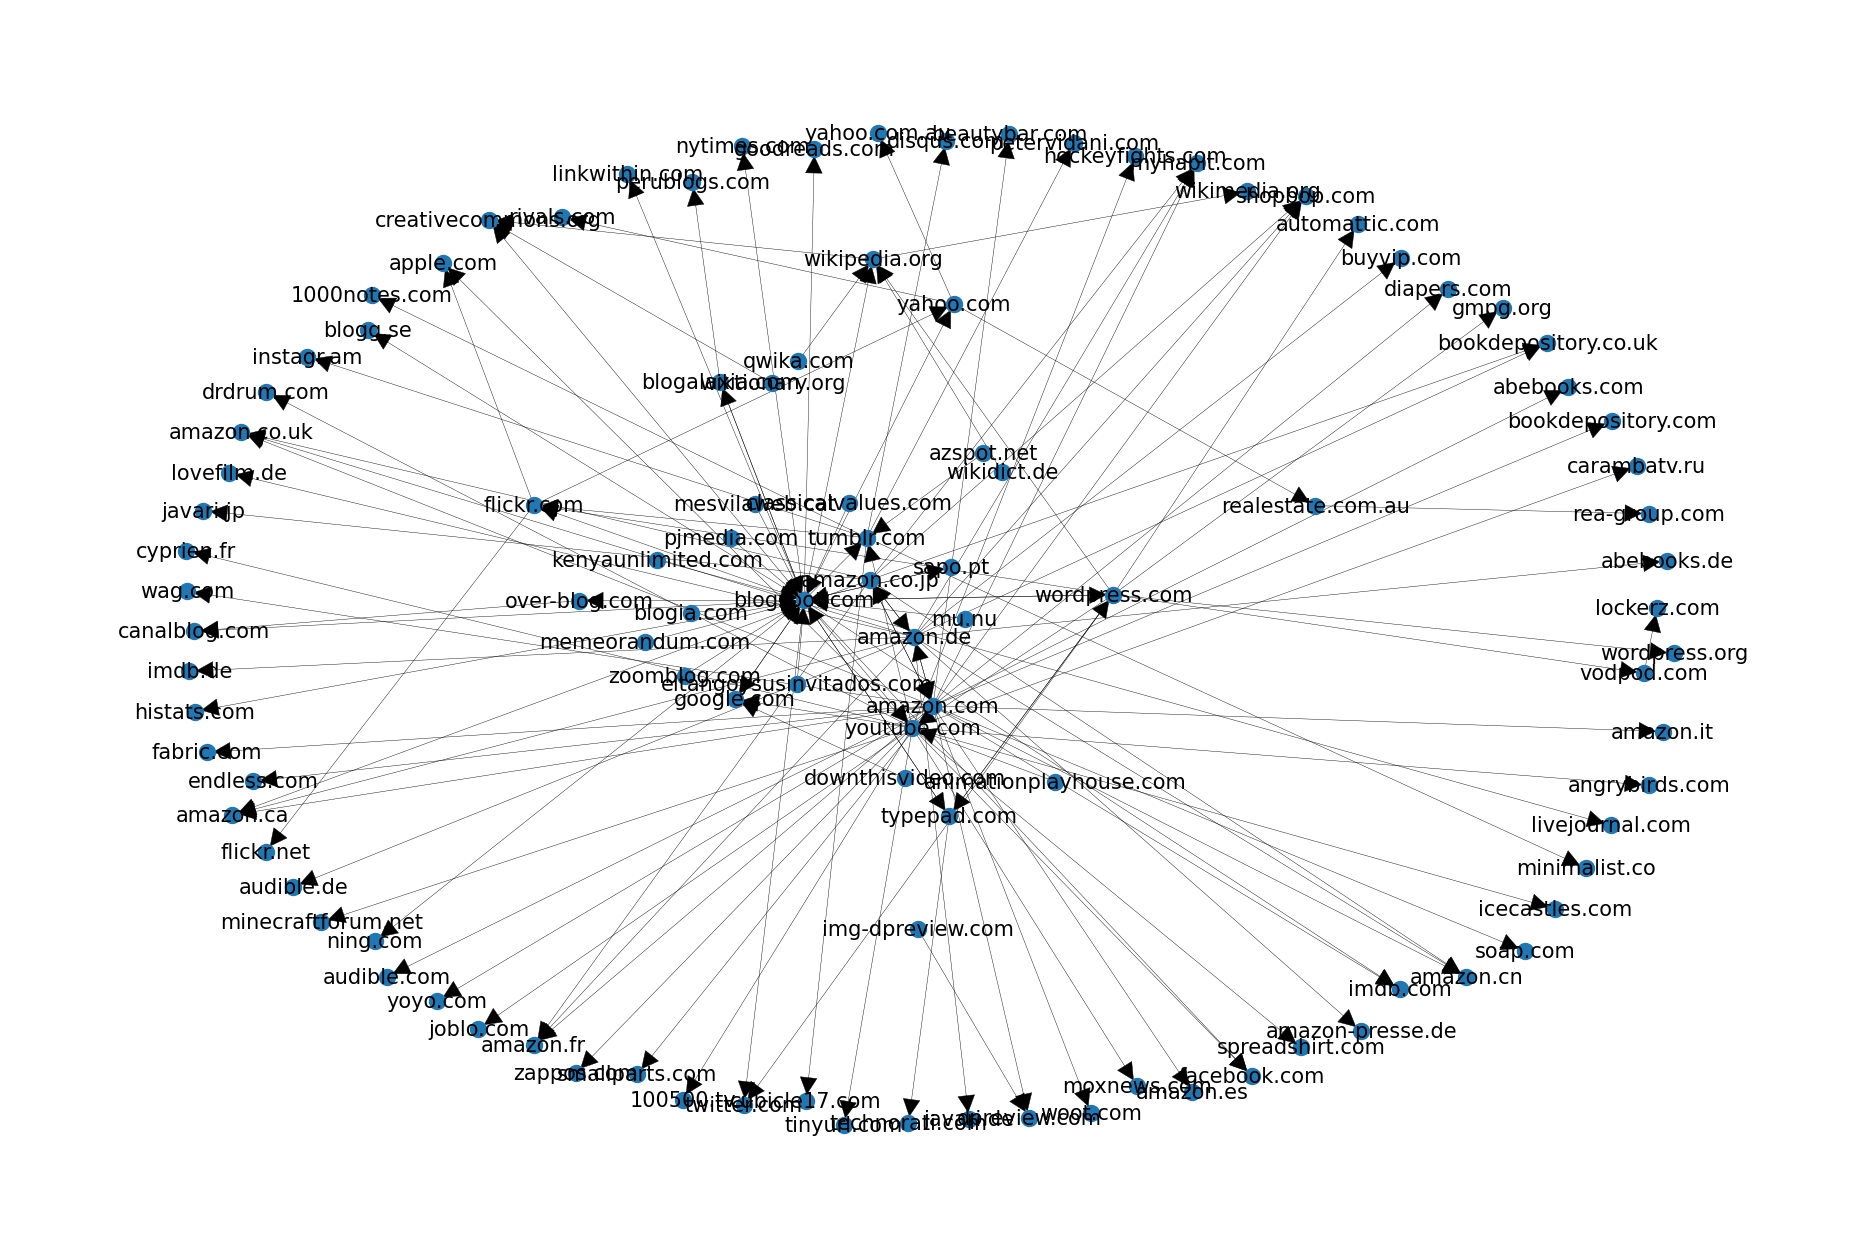

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(dpi=300)
G = nx.DiGraph()
for e in edges:
   G.add_edge(nodes[e[0]], nodes[e[1]])
pos = nx.spring_layout(G, k=1, iterations=200)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=5, width=0.1)

In [ ]:
def pagerank(edges, beta, threshold=10^-20, n_epochs=100):
  n_nodes = 0
  for u, v in edges:
    n_nodes = max(u,v,n_nodes)
  n_nodes += 1

  adj = [[] for _ in range(n_nodes)]
  for u,v in edges:
    adj[u].append(v)
  r = [1/n_nodes] * n_nodes

  for epoch in range(n_epochs):
    r_next = [0] * n_nodes
    
    for u,uN in enumerate(adj):
      du = len(uN)
      ru = r[u]

      for v in uN:
        r_next[v] += (1-beta) * ru /du
  # for u in range(n_nodes):
  #   r_next[u] += beta/n_nodes
    rsize = sum(r_next)
    for i in range(n_nodes):
      r_next[i] = r_next[i] / rsize
    
    delta = sum(abs(a-b) for a, b in zip(r, r_next))
    r = r_next
    if delta < threshold:
      break
  
  return r
  r = pagerank(edges,beta=0.2)

In [ ]:
r = pagerank(edges, 0.15)
for score, node in sorted(zip(r, nodes), reverse=True)[:10]:
   print(f"({score:.6f}) {node}")

(0.119716) blogspot.com
(0.079601) rea-group.com
(0.047232) canalblog.com
(0.040512) creativecommons.org
(0.036622) yahoo.com
(0.031438) wordpress.com
(0.031173) yahoo.com.au
(0.031173) rivals.com
(0.031173) realestate.com.au
(0.027409) flickr.com
